# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
iris = pd.read_csv("./iris.csv")
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [2]:
iris.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

Fill missing values with median of that particular column

In [3]:
iris.fillna(iris.median(), inplace=True)

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [6]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [7]:
iris.var()

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

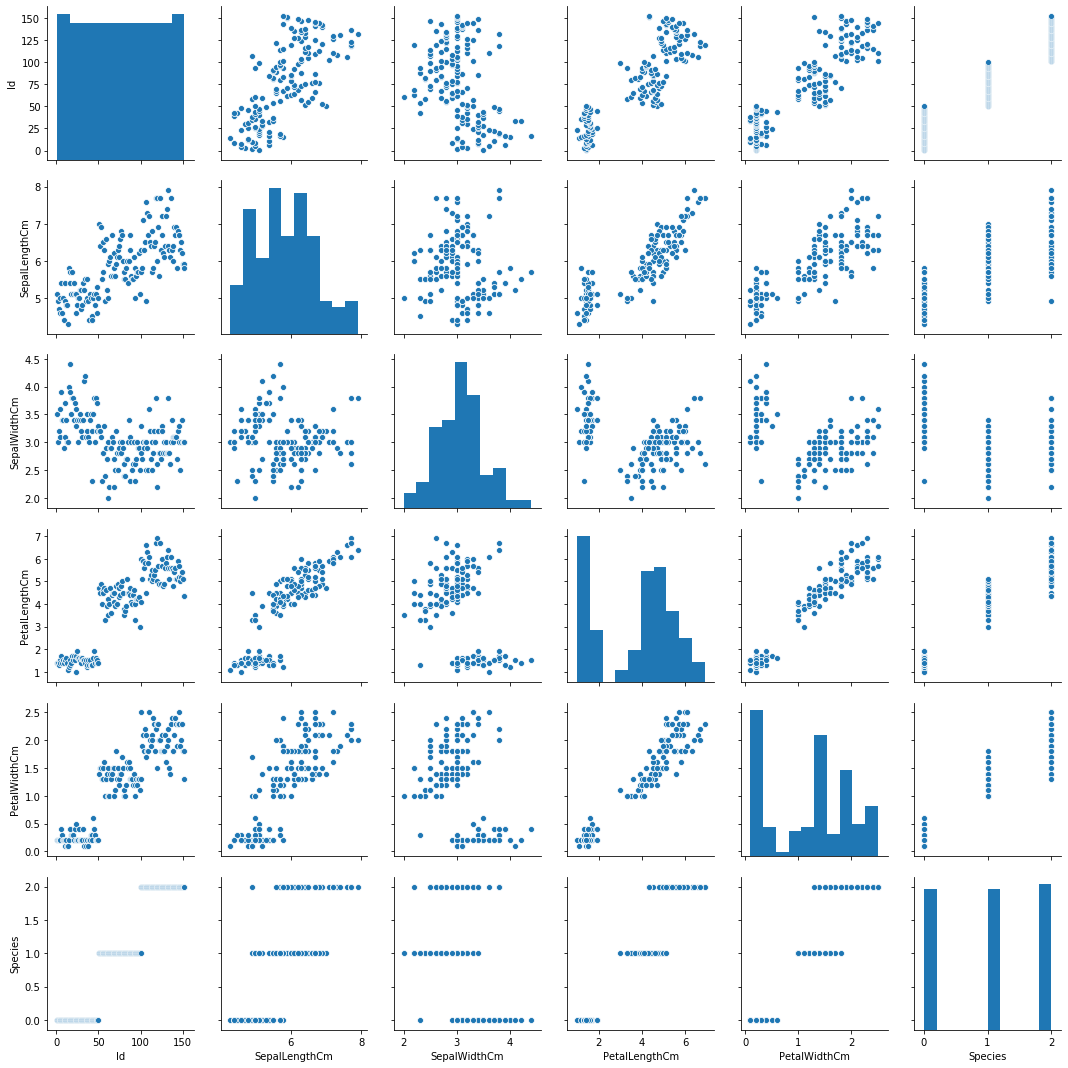

In [8]:
sns.pairplot(iris)

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [9]:
from sklearn.model_selection import train_test_split

X =  iris.drop(['Species','Id'], axis=1)
Y = iris['Species']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=7)

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in [3,5,9]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(Y_test, y_pred))

0.9354838709677419
0.967741935483871
0.9032258064516129


## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [11]:
ac_scores = []
for k in range(1,21,2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(Y_test, y_pred)
    ac_scores.append((score, k))
    
print("The max accuracey and optimal number of neighbours is {}".format(max(ac_scores)))

The max accuracey and optimal number of neighbours is (0.967741935483871, 5)


## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

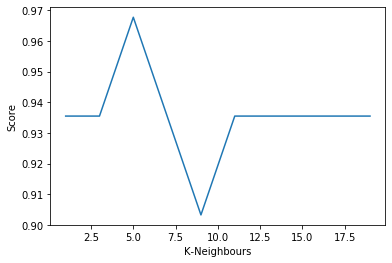

In [12]:
score, k = zip(*ac_scores)
plt.plot(k, score)
plt.xlabel("K-Neighbours")
plt.ylabel("Score")
plt.show()


# Breast cancer dataset - OPTIONAL

## Read data

### Question 1
Read the data given in bc2.csv file

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [14]:
# reading the dataset using read_csv
# Checking the first 5 rows in the dataset using head()

bc = pd.read_csv("./bc2.csv")
bc.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [15]:
# .info() provides a overall view of the number of datapoints present in the columns and the datatype of the each columns
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


# Upon checking the .info for the dataset, I can see that the dataset has no missing values and the column Bare Nuclei is the only column with object dataset and rest of the columns are of integer dataset

In [16]:
# checking if there are columns that is not presented while executing head()
bc.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [17]:
# .describe give the 5 point summary of a dataset.
bc.describe(include = 'all')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


- We have already identifed that there is no missing values in the dataset using the info fucntion and the same is confirmed by the describe function variable count.
- We see that there is no outliars since the mean of each colums is almost close to the 50% percentile(median) of the same column.
- We see that the Bare Nuclei column is of object datatype and has to be converted to the int datatype

#### Check Missing Values

In [18]:
bc.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

- We can see that there are no missing values for any of the columns in the dataset

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [19]:
bc[bc['Bare Nuclei']=='?']['Bare Nuclei'].count()

16

- On check the '?' count in the Bare Nuclei column we find that there are 16 rows that contains '?'.

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [20]:
data = bc.describe(include='all')

In [21]:
topvalue = data['Bare Nuclei']['top']

In [22]:
bc['Bare Nuclei'].replace({'?':topvalue}, inplace=True)

In [23]:
# Checking if the '?' values in the Bare Nuclei is replaced
bc['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

- One executing .unique we see that the '?' is imputed with value '1'

### Question 5
#### Find the distribution of target variable (Class) 

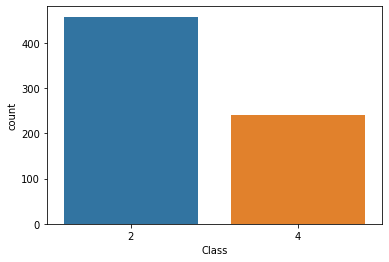

In [24]:
sns.countplot(x=bc['Class'])

#### Plot the distribution of target variable using histogram

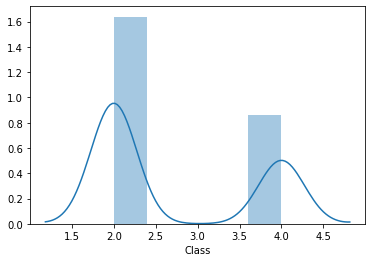

In [25]:
sns.distplot(bc['Class'],kde=True)

#### Convert the datatype of Bare Nuclei to `int`

In [26]:
bc['Bare Nuclei'] = bc['Bare Nuclei'].astype(np.int64)

In [27]:
# Bare Nuclei is converted to integer datatype
bc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

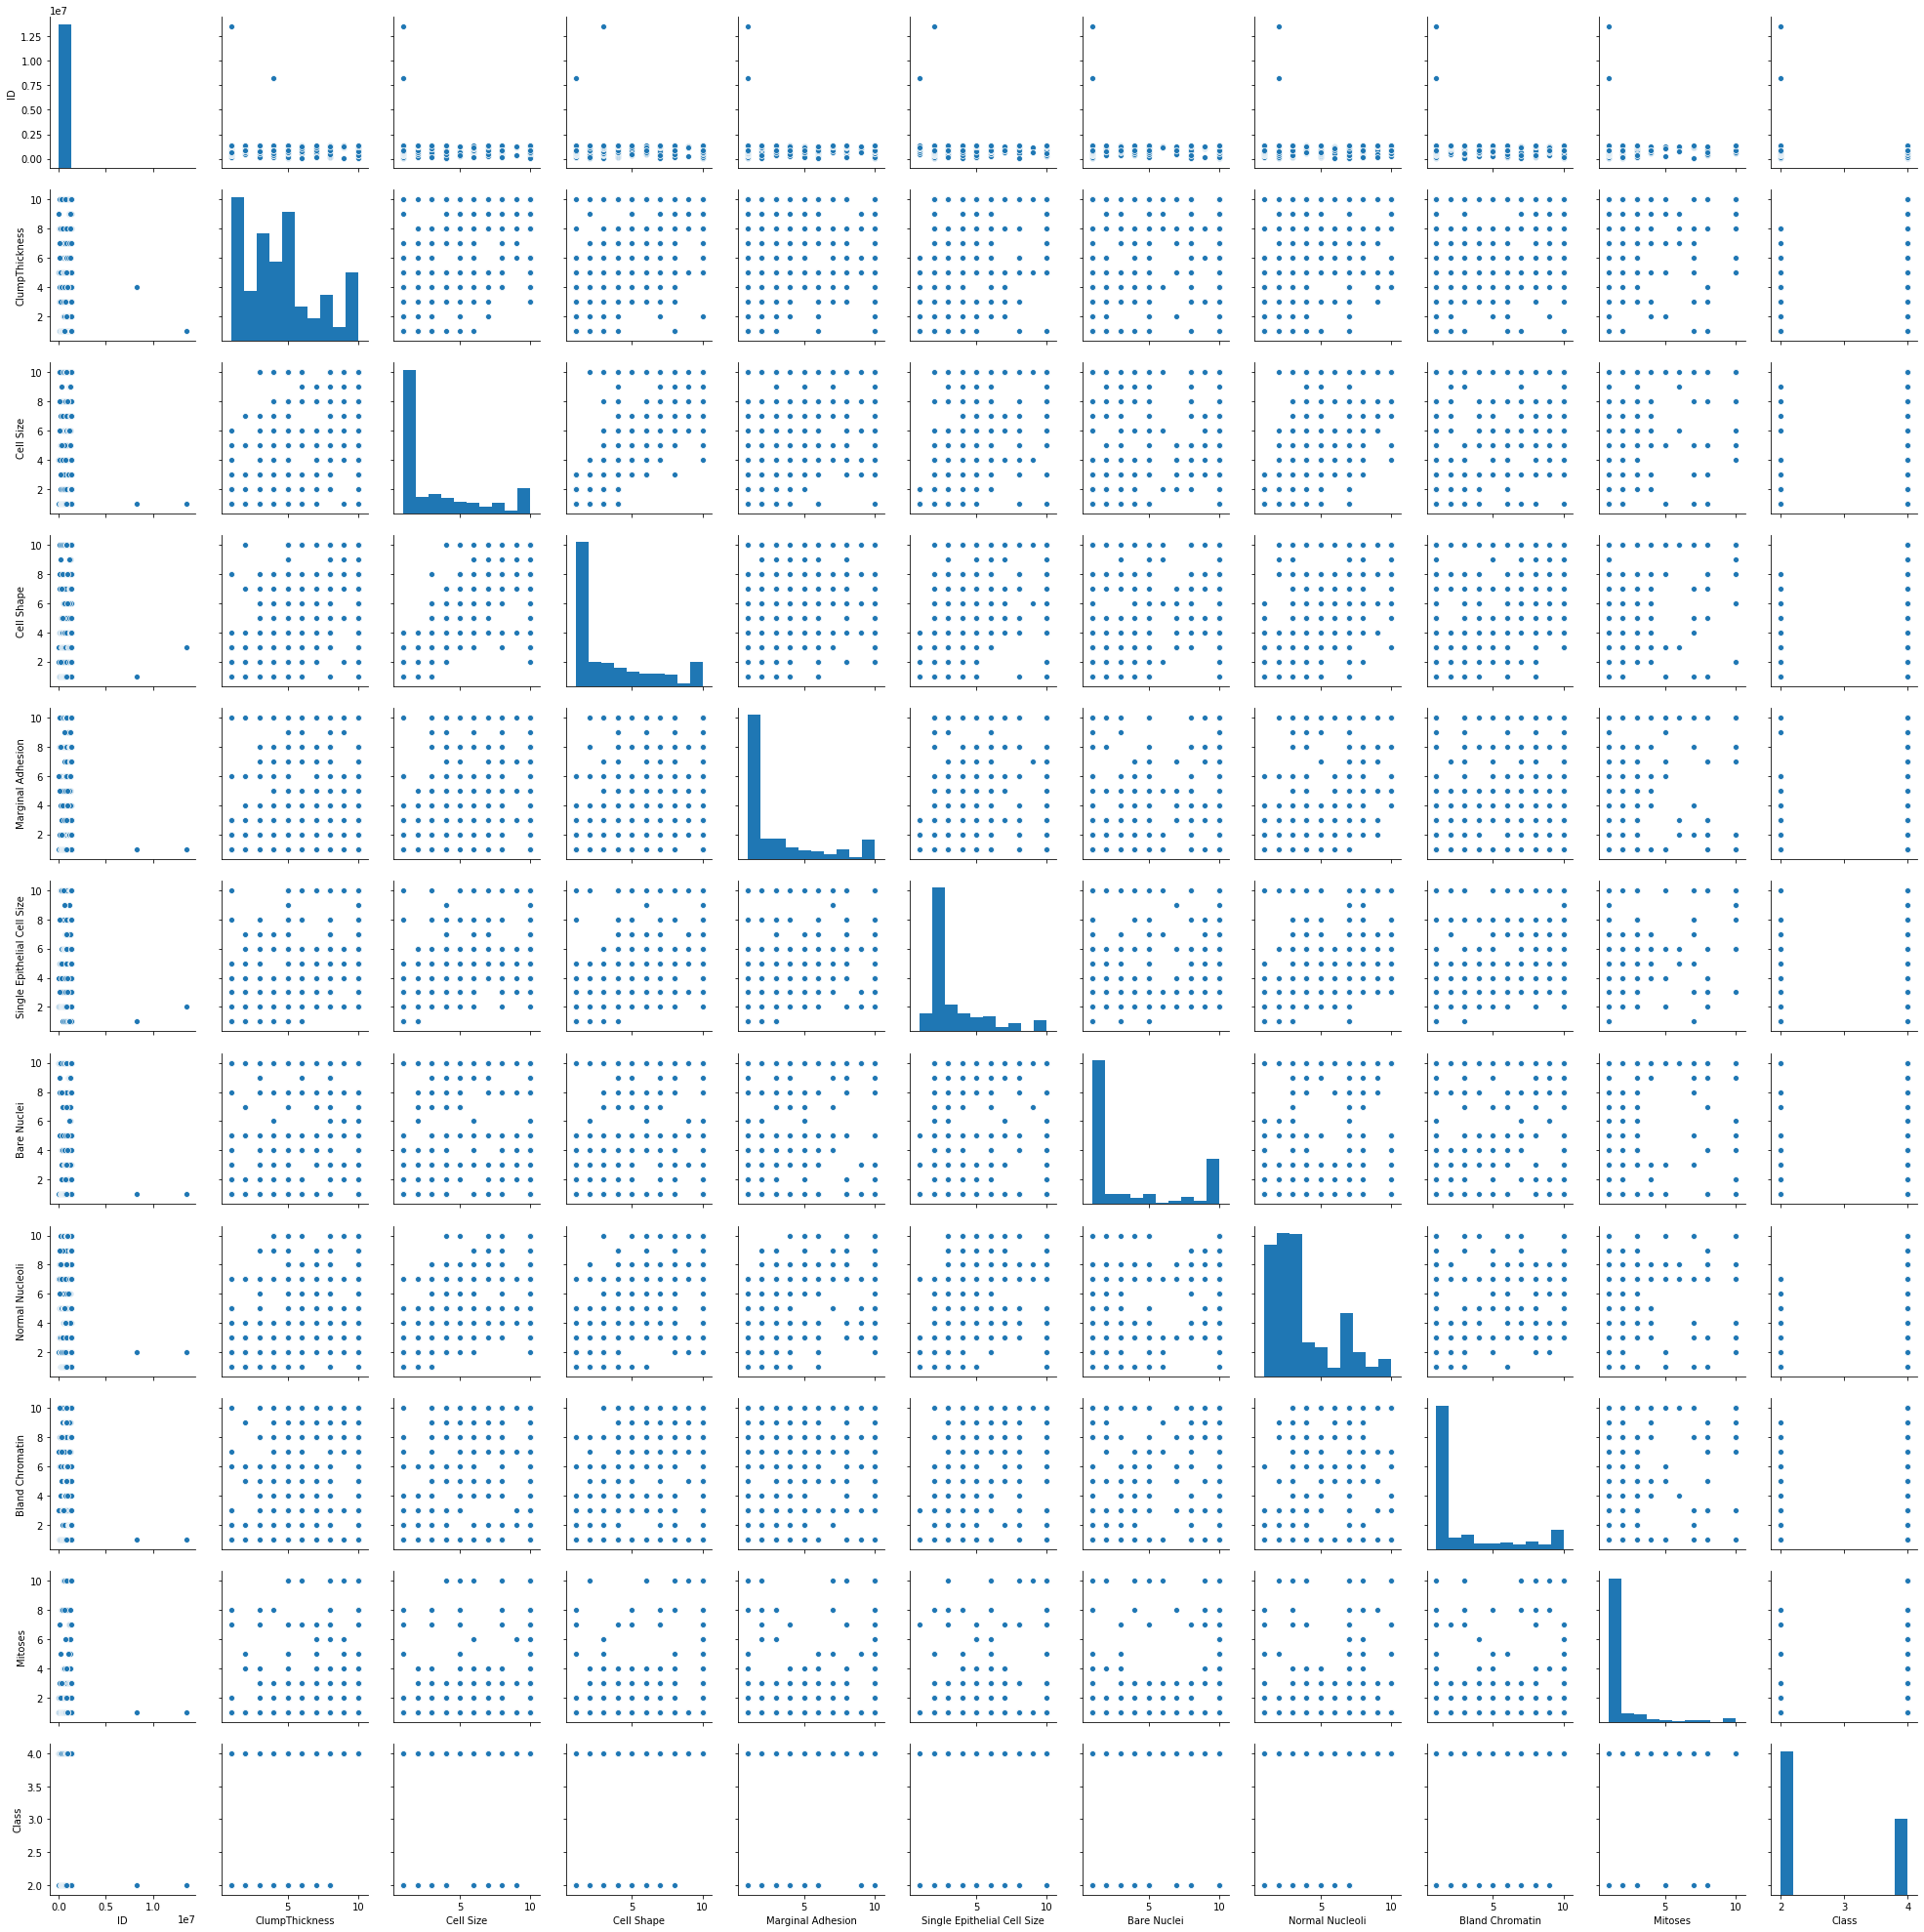

In [28]:
sns.pairplot(bc)

In [29]:
bc.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X =  bc.drop(['ID','Class','Mitoses'], axis=1)
Y = bc['Class']

- While checking the correlation of every column with call I see that the column 'Mitoses' has a less correlation of 0.423170 when compared with other Columns that are influencing the Class Column.
- Hence the column Mitoses is removed from the feature variable to improve the accuracy of the Model

#### Divide the Training and Test sets in 70:30 

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=7)

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [32]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled=scalar.fit_transform(X_test)
print("X_Trained Standardized : {}".format(X_train_scaled))
print("X_Test Standardized : {}".format(X_test_scaled))

X_Trained Standardized : [[ 1.22882709  0.26682751  0.59488028 ... -0.68544594  1.46053872
   0.04638448]
 [-0.15812374 -0.70447759 -0.74720257 ... -0.68544594 -1.03086861
  -0.61106513]
 [-0.50486145 -0.70447759 -0.74720257 ... -0.68544594 -1.03086861
  -0.61106513]
 ...
 [ 0.18861397 -0.70447759 -0.41168186 ... -0.68544594 -0.2003995
  -0.61106513]
 [ 1.22882709  0.26682751  0.25935957 ...  0.95895177  1.46053872
   1.69000852]
 [ 0.18861397  1.56190097  1.26592171 ...  1.78115062  0.63006961
   1.36128371]]
X_Test Standardized : [[ 1.39035423  0.32569802  2.3224695  ...  0.1542735   1.46769208
   2.31500235]
 [-1.2605157  -0.35149588 -0.05498883 ... -0.69087696 -0.53370621
  -0.61361508]
 [-0.12442859 -0.69009283 -0.73426264 ... -0.69087696 -0.93398587
  -0.61361508]
 ...
 [-0.50312429 -0.69009283 -0.73426264 ... -0.69087696 -0.53370621
  -0.61361508]
 [-1.2605157  -0.69009283 -0.73426264 ... -0.69087696 -0.13342655
  -0.61361508]
 [ 1.76904993  2.3572797   2.3224695  ...  0.4359903

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [33]:
for k in [3, 5, 9]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    Y_pred =  model.predict(X_test)
    print(accuracy_score(Y_test, Y_pred))

0.9714285714285714
0.9619047619047619
0.9428571428571428


## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [34]:
ac_score = []

for k in range(1,21,2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    Y_pred =  model.predict(X_test)
    score = accuracy_score(Y_test, Y_pred)
    ac_score.append((score,k))
    print("K : {} ------------------  Accuracy : {}".format(k,score))
    
maxacc = max(ac_score)
print("The optimal number of K neighbours is {} with an accuracy score of {}.".format(maxacc[1], maxacc[0]))

K : 1 ------------------  Accuracy : 0.9380952380952381
K : 3 ------------------  Accuracy : 0.9714285714285714
K : 5 ------------------  Accuracy : 0.9619047619047619
K : 7 ------------------  Accuracy : 0.9523809523809523
K : 9 ------------------  Accuracy : 0.9428571428571428
K : 11 ------------------  Accuracy : 0.9476190476190476
K : 13 ------------------  Accuracy : 0.9380952380952381
K : 15 ------------------  Accuracy : 0.9380952380952381
K : 17 ------------------  Accuracy : 0.9333333333333333
K : 19 ------------------  Accuracy : 0.9333333333333333
The optimal number of K neighbours is 3 with an accuracy score of 0.9714285714285714.


## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

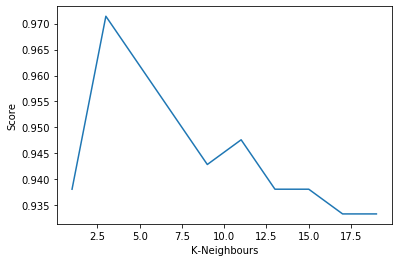

In [35]:
score, k = zip(*ac_score)
plt.plot(k, score)
plt.xlabel("K-Neighbours")
plt.ylabel("Score")
plt.show()

In [36]:
# Accuracy Difference
0.9714285714285714-0.9619047619047619


0.00952380952380949

## Project Summary

- On testing the Model with removing the column Mitoses we have a accuracy of 0.9714285714285714 when the K is 3, however when the column Mitoses is included to the features the accuracy is dropped to 0.9619047619047619 when the K is 3.
- The accuracy is increased by 0.00952380952380949 that is a huge margin in domain space of Medicine.
- The other K variables are not yealding a better accuracy when the K is not 3 or when the column Mitoses is added back to the feature vaiable.

## The End